<a href="https://colab.research.google.com/github/reyaput/Data-analysis-exercise/blob/main/Countries_of_the_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
!pip install ipython-sql sqlalchemy
%load_ext sql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [68]:
file_id = "1akfqwdhdVnLEMroxbk9pfJsq-KlrMcWj"
# Modified export_url for direct download of a file from Google Drive
export_url = f"https://drive.google.com/uc?export=download&id={file_id}"

data = pd.read_csv(export_url)

engine = create_engine('sqlite:///data.db')

data.to_sql('data', engine, if_exists='replace', index=False)

%sql sqlite:///data.db

In [69]:
query = "SELECT * FROM data"
hasil = pd.read_sql(query, engine)

display(hasil)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,None,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",None,None,NaN,None,None,"0,02",0,"99,98",1,None,None,None,None,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


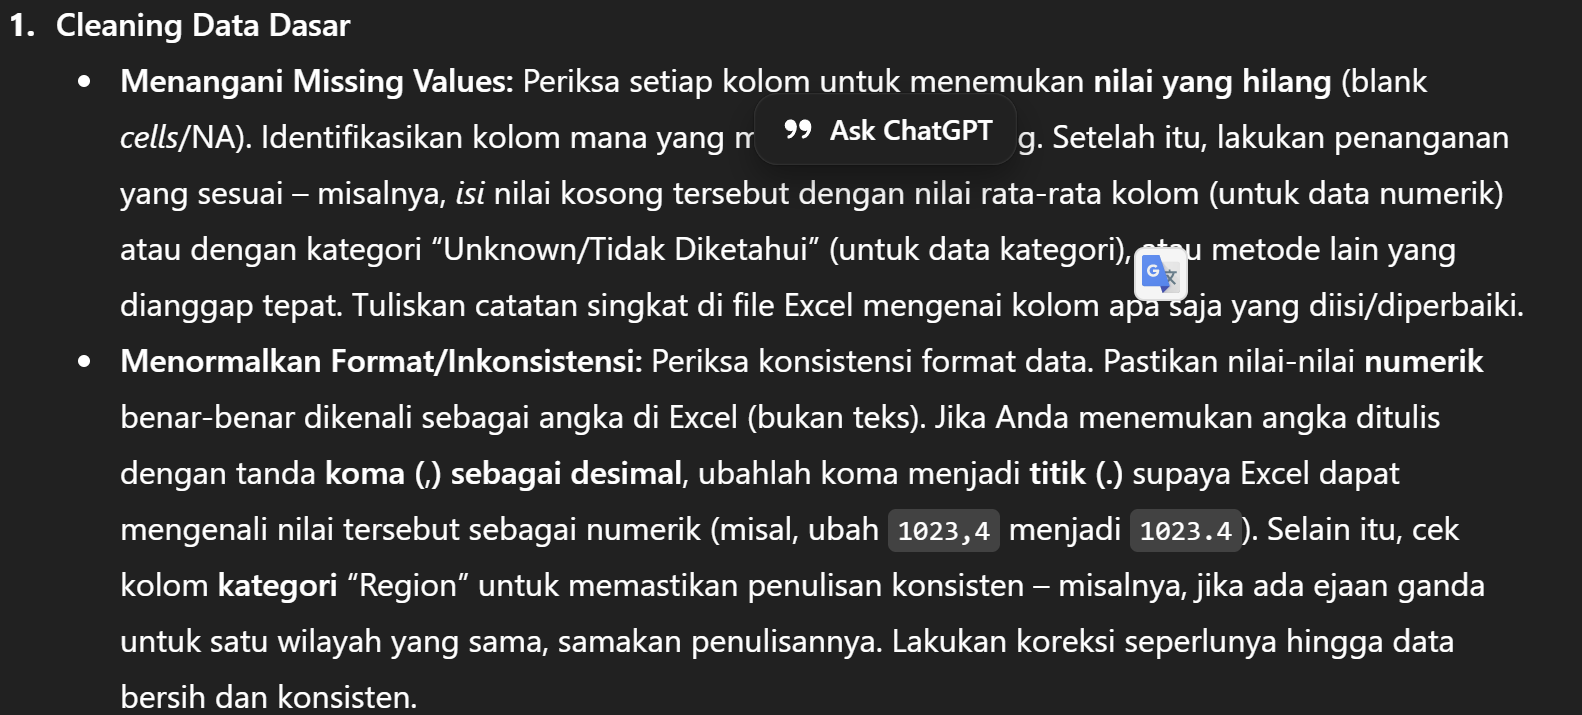

In [70]:
columns = data.columns
sql_parts = []
for col in columns:
    sql_parts.append(f"SUM(CASE WHEN \"{col}\" IS NULL THEN 1 ELSE 0 END) AS \"{col}_missing\"")

sql_query_missing = f"SELECT {', '.join(sql_parts)} FROM data"

missing_values_sql = pd.read_sql(sql_query_missing, engine)
display(missing_values_sql)

,Country_missing,Region_missing,Population_missing,Area (sq. mi.)_missing,Pop. Density (per sq. mi.)_missing,Coastline (coast/area ratio)_missing,Net migration_missing,Infant mortality (per 1000 births)_missing,GDP ($ per capita)_missing,Literacy (%)_missing,Phones (per 1000)_missing,Arable (%)_missing,Crops (%)_missing,Other (%)_missing,Climate_missing,Birthrate_missing,Deathrate_missing,Agriculture_missing,Industry_missing,Service_missing
0,0,0,0,0,0,0,3,3,1,18,4,2,2,2,22,3,4,15,16,15


In [71]:
print(data.isnull().sum())

#ubah missing ke "0"

data = data.fillna("0")

print(data.isnull().sum())

# Save the modified DataFrame back to the SQLite database, replacing the old table
data.to_sql('data', engine, if_exists='replace', index=False)

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64
Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. De

227

In [72]:
query = "SELECT * FROM data"
hasil = pd.read_sql(query, engine)

display(hasil)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",0,0,0
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,0,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",0,0,0,0,0,"0,02",0,"99,98",1,0,0,0,0,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [73]:
query = "PRAGMA table_info(data)"
hasil = pd.read_sql(query, engine)

display(hasil)

,cid,name,type,notnull,dflt_value,pk
0,0,Country,TEXT,0,None,0
1,1,Region,TEXT,0,None,0
2,2,Population,BIGINT,0,None,0
3,3,Area (sq. mi.),BIGINT,0,None,0
4,4,Pop. Density (per sq. mi.),TEXT,0,None,0
5,5,Coastline (coast/area ratio),TEXT,0,None,0
6,6,Net migration,TEXT,0,None,0
7,7,Infant mortality (per 1000 births),TEXT,0,None,0
8,8,GDP ($ per capita),TEXT,0,None,0
9,9,Literacy (%),TEXT,0,None,0


In [82]:
target_types = {
    'Pop. Density (per sq. mi.)': 'float',
    'Coastline (coast/area ratio)': 'float',
    'Net migration': 'float',
    'Infant mortality (per 1000 births)': 'float',
    'GDP ($ per capita)': 'Int64',
    'Literacy (%)': 'float',
    'Phones (per 1000)': 'float',
    'Arable (%)': 'float',
    'Crops (%)': 'float',
    'Other (%)': 'float',
    'Climate': 'float',
    'Birthrate': 'float',
    'Deathrate': 'float',
    'Agriculture': 'float',
    'Industry': 'float',
    'Service': 'float'
}

for col, tipe_tujuan in target_types.items():
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace(',', '.')
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].astype(tipe_tujuan)
data.info()

data.to_sql('data', engine, if_exists='replace', index=False)

query = "PRAGMA table_info(data)"
hasil = pd.read_sql(query, engine)

display(hasil)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    Int64  
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

,cid,name,type,notnull,dflt_value,pk
0,0,Country,TEXT,0,None,0
1,1,Region,TEXT,0,None,0
2,2,Population,BIGINT,0,None,0
3,3,Area (sq. mi.),BIGINT,0,None,0
4,4,Pop. Density (per sq. mi.),FLOAT,0,None,0
5,5,Coastline (coast/area ratio),FLOAT,0,None,0
6,6,Net migration,FLOAT,0,None,0
7,7,Infant mortality (per 1000 births),FLOAT,0,None,0
8,8,GDP ($ per capita),BIGINT,0,None,0
9,9,Literacy (%),FLOAT,0,None,0


In [86]:
from sqlalchemy import text

query = """UPDATE data
SET
    "Pop. Density (per sq. mi.)" = REPLACE("Pop. Density (per sq. mi.)", ',', '.'),
    "Coastline (coast/area ratio)" = REPLACE("Coastline (coast/area ratio)", ',', '.'),
    "Net migration" = REPLACE("Net migration", ',', '.'),
    "Infant mortality (per 1000 births)" = REPLACE("Infant mortality (per 1000 births)", ',', '.'),
    "Literacy (%)" = REPLACE("Literacy (%)", ',', '.'),
    "Phones (per 1000)" = REPLACE("Phones (per 1000)", ',', '.'),
    "Arable (%)" = REPLACE("Arable (%)", ',', '.'),
    "Crops (%)" = REPLACE("Crops (%)", ',', '.'),
    "Other (%)" = REPLACE("Other (%)", ',', '.'),
    "Climate" = REPLACE("Climate", ',', '.'),
    "Birthrate" = REPLACE("Birthrate", ',', '.'),
    "Deathrate" = REPLACE("Deathrate", ',', '.'),
    "Agriculture" = REPLACE("Agriculture", ',', '.'),
    "Industry" = REPLACE("Industry", ',', '.'),
    "Service" = REPLACE("Service", ',', '.');"""

with engine.connect() as conn:
    conn.execute(text(query))
    conn.commit()

print("Database updated. Reloading data to display.")
hasil = pd.read_sql("SELECT * FROM data", engine)
display(hasil)

Database updated. Reloading data to display.


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800,0.0,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0,0.0,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


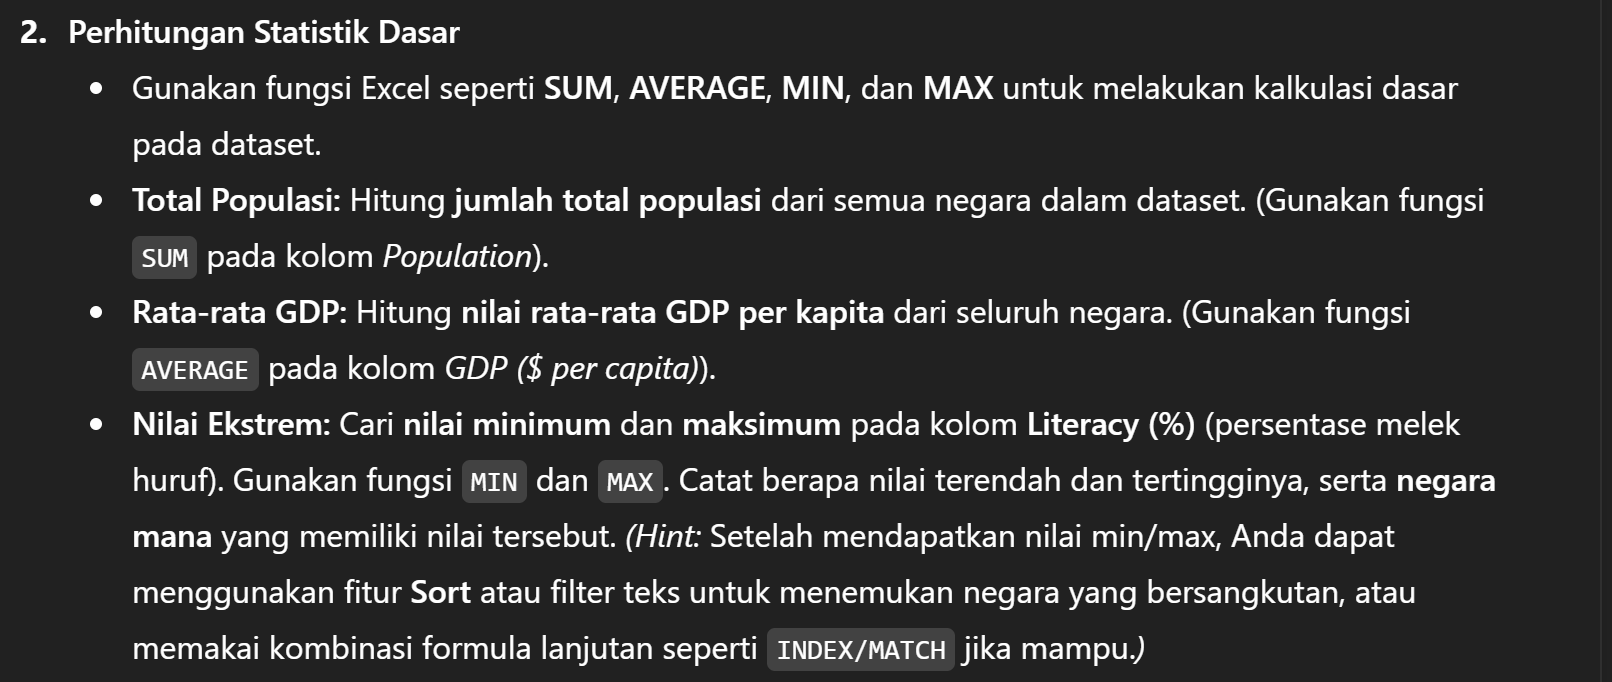

In [108]:
query = """SELECT SUM(POPULATION)
FROM data"""
hasil = pd.read_sql(query, engine)

display(hasil)

query = """
SELECT AVG("GDP ($ per capita)")
FROM data
"""

hasil = pd.read_sql(query, engine)

display(hasil)

query = """
WITH Stats AS (
    SELECT
        MIN("Literacy (%)") as MinLit,
        MAX("Literacy (%)") as MaxLit
    FROM data
    WHERE "Literacy (%)" != 0
)
SELECT
    d.Country,
    d."Literacy (%)",
    CASE
        WHEN d."Literacy (%)" = s.MinLit THEN 'Minimum'
        WHEN d."Literacy (%)" = s.MaxLit THEN 'Maximum'
    END as Kategori
FROM data d
JOIN Stats s
    ON d."Literacy (%)" = s.MinLit OR d."Literacy (%)" = s.MaxLit
ORDER BY d."Literacy (%)";
"""

hasil = pd.read_sql(query, engine)
display(hasil)

,SUM(POPULATION)
0,6524044551


,"AVG(""GDP ($ per capita)"")"
0,9647.136564


,Country,Literacy (%),Kategori
0,Niger,17.6,Minimum
1,Andorra,100.0,Maximum
2,Australia,100.0,Maximum
3,Denmark,100.0,Maximum
4,Finland,100.0,Maximum
5,Liechtenstein,100.0,Maximum
6,Luxembourg,100.0,Maximum
7,Norway,100.0,Maximum


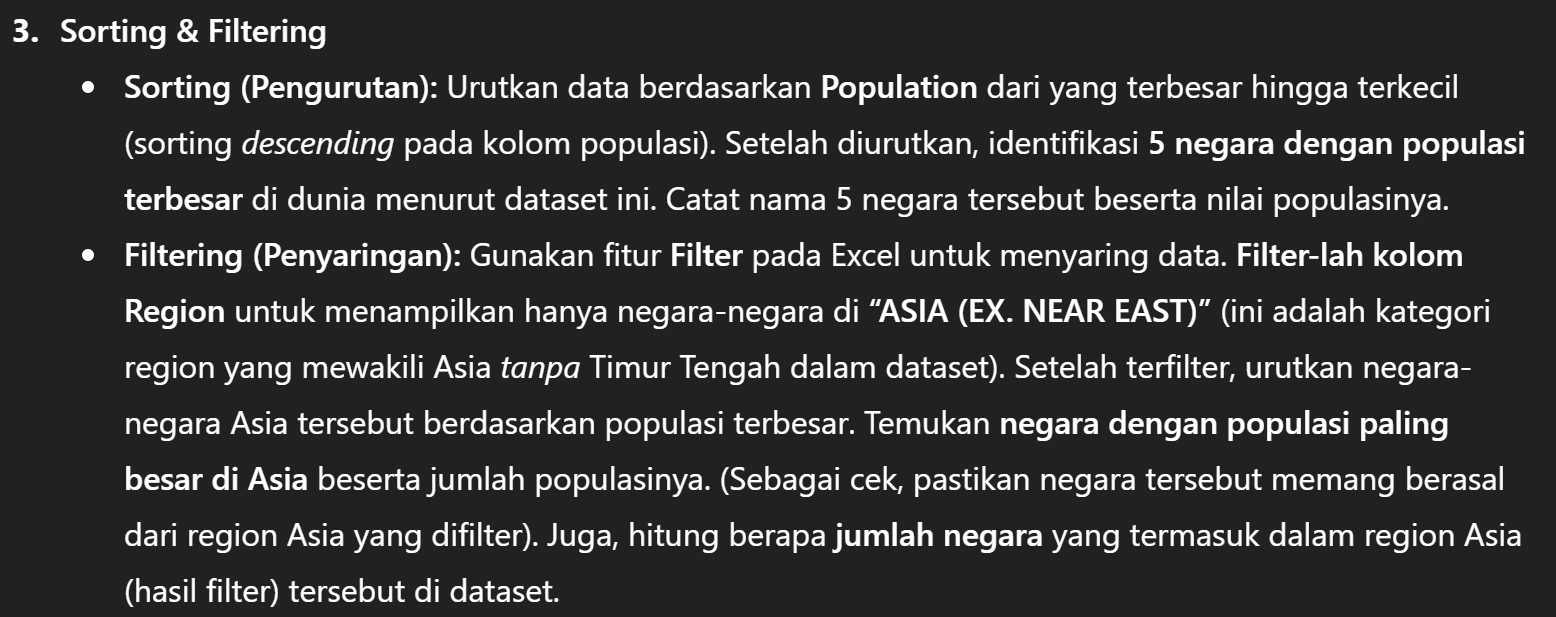

In [128]:
query_top_population = """SELECT Country, Population
FROM data
ORDER BY Population DESC
LIMIT 5"""

hasil_top_pop = pd.read_sql(query_top_population, engine)
display(hasil_top_pop)

query = """
SELECT Country,Region, Population
FROM data
WHERE Region = 'ASIA (EX. NEAR EAST)'
ORDER BY Population DESC
LIMIT 10
"""

hasil = pd.read_sql(query, engine)
display(hasil)

,Country,Population
0,China,1313973713
1,India,1095351995
2,United States,298444215
3,Indonesia,245452739
4,Brazil,188078227


,Country,Region,Population
0,China,ASIA (EX. NEAR EAST),1313973713
1,India,ASIA (EX. NEAR EAST),1095351995
2,Indonesia,ASIA (EX. NEAR EAST),245452739
3,Pakistan,ASIA (EX. NEAR EAST),165803560
4,Bangladesh,ASIA (EX. NEAR EAST),147365352
5,Japan,ASIA (EX. NEAR EAST),127463611
6,Philippines,ASIA (EX. NEAR EAST),89468677
7,Vietnam,ASIA (EX. NEAR EAST),84402966
8,Iran,ASIA (EX. NEAR EAST),68688433
9,Thailand,ASIA (EX. NEAR EAST),64631595


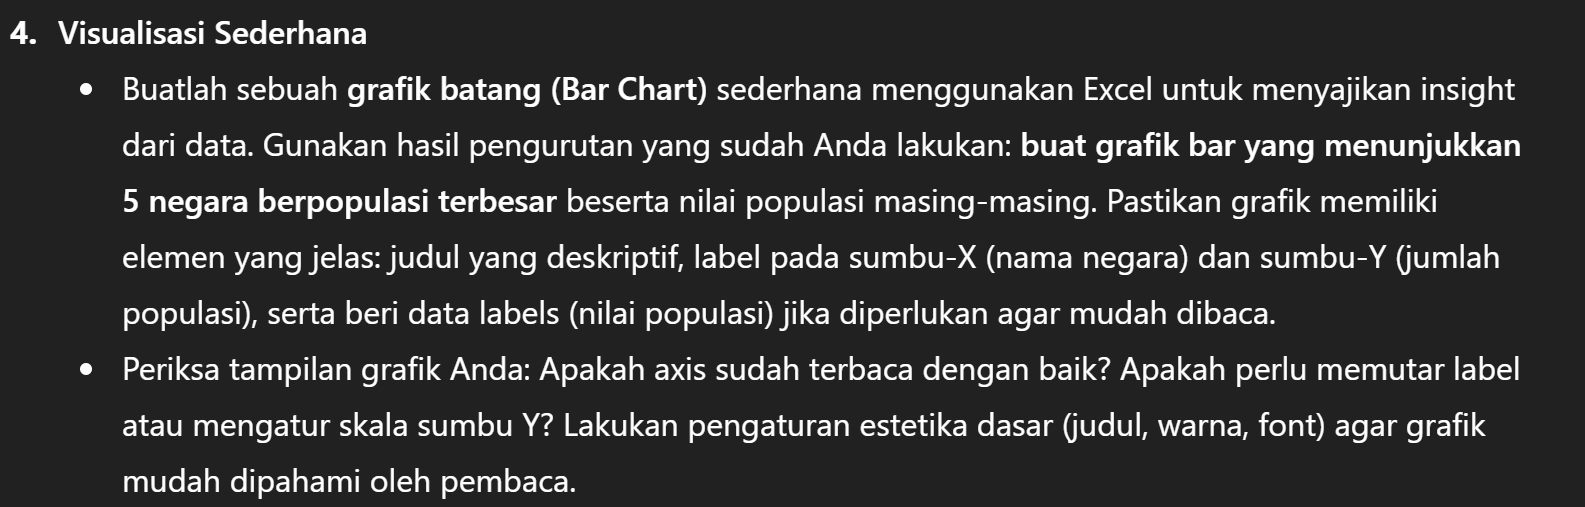

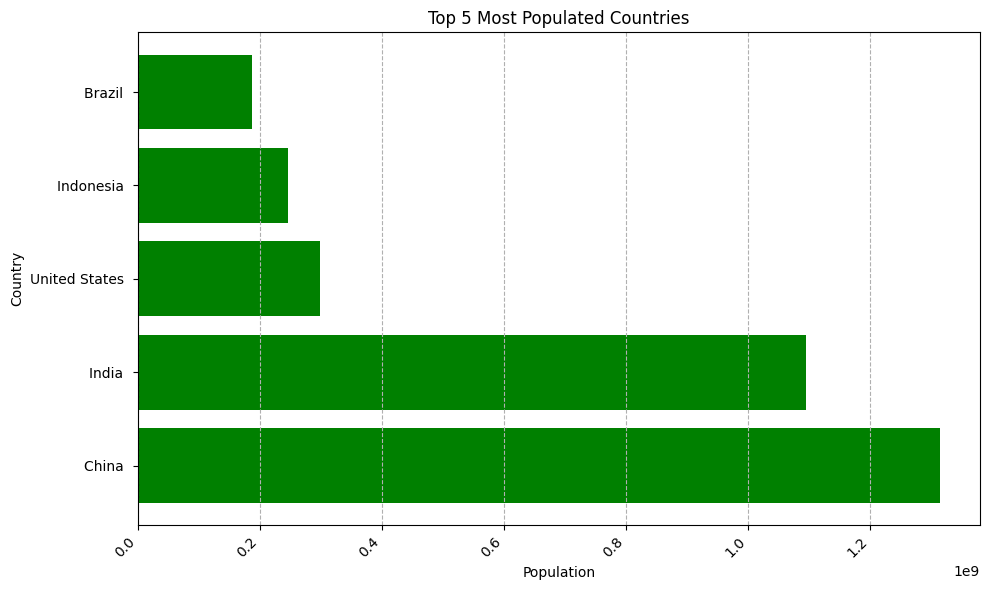

In [132]:
plt.figure(figsize=(10, 6))
plt.barh(hasil_top_pop['Country'], hasil_top_pop['Population'], color='green')
plt.xlabel('Population')
plt.ylabel('Country')
plt.title('Top 5 Most Populated Countries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()